## https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset


### link for data used in thsi project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning the data

In [2]:
df = pd.read_csv('game_info.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    474417 non-null  int64  
 1   slug                  474415 non-null  object 
 2   name                  474415 non-null  object 
 3   metacritic            4733 non-null    float64
 4   released              450218 non-null  object 
 5   tba                   474417 non-null  bool   
 6   updated               474417 non-null  object 
 7   website               65041 non-null   object 
 8   rating                474417 non-null  float64
 9   rating_top            474417 non-null  int64  
 10  playtime              474417 non-null  int64  
 11  achievements_count    474417 non-null  int64  
 12  ratings_count         474417 non-null  int64  
 13  suggestions_count     474417 non-null  int64  
 14  game_series_count     474417 non-null  int64  
 15  

In [4]:
df.isnull().sum()

id                           0
slug                         2
name                         2
metacritic              469684
released                 24199
tba                          0
updated                      0
website                 409376
rating                       0
rating_top                   0
playtime                     0
achievements_count           0
ratings_count                0
suggestions_count            0
game_series_count            0
reviews_count                0
platforms                 3986
developers                8366
genres                  103185
publishers              333384
esrb_rating             418553
added_status_yet             0
added_status_owned           0
added_status_beaten          0
added_status_toplay          0
added_status_dropped         0
added_status_playing         0
dtype: int64

In [5]:
df[df['name'].isnull()].index.tolist() # getting the lsit missing values in column 'name'

[128, 20727]

In [6]:
df.dropna(subset=['name', 'slug'], inplace=True)

In [7]:
# droping 'metacritic' becouse most  values are missing
df.drop(['metacritic','released', 'website'],axis=1,inplace=True) 

## Analyzing the data

In [8]:
df['esrb_rating'].unique() # getting the unique values in this column

array(['Everyone 10+', 'Everyone', 'Teen', nan, 'Mature', 'Adults Only',
       'Rating Pending'], dtype=object)

In [9]:
# ESRB ratings provide information about what's in a game or app 
# so parents and consumers can make informed choices about which games are right for their family.
df['esrb_rating'].value_counts() # getting the counts of  values in this column

Everyone 10+      36682
Teen              10031
Mature             4859
Everyone           3837
Adults Only         405
Rating Pending       50
Name: esrb_rating, dtype: int64

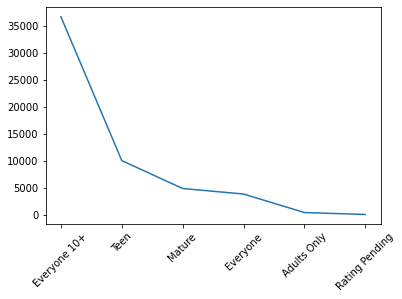

In [10]:
# representation of the esrb ratings
df['esrb_rating'].value_counts().plot()
plt.xticks(rotation=45);

In [11]:
# turn string to list to expand  it
def stringToList(x):
    """
    function used to turn the string into list inside pandas df
    
    """
    if isinstance(x, str):
        return x.split('||')
    else:
        return x

df['genres'] = df['genres'].apply(stringToList)

df['platforms'] = df['platforms'].apply(stringToList)

# df['publishers'] = df['publishers'].apply(stringToList)

# df['developers'] = df['developers'].apply(stringToList)

In [12]:
df['platforms'].explode().value_counts().head(10)

PC                 276428
Web                111638
iOS                 67568
macOS               61658
Linux               42826
Android             33227
PlayStation 4        5398
Xbox One             4082
Nintendo Switch      3962
PlayStation 3        3610
Name: platforms, dtype: int64

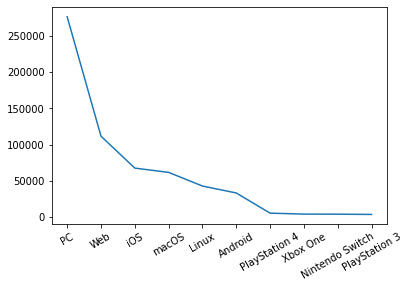

In [13]:
#  most well known platforms
df['platforms'].explode().value_counts().head(10).plot()
plt.xticks(np.arange(10),df['platforms'].explode().value_counts().index[:10],rotation=30);

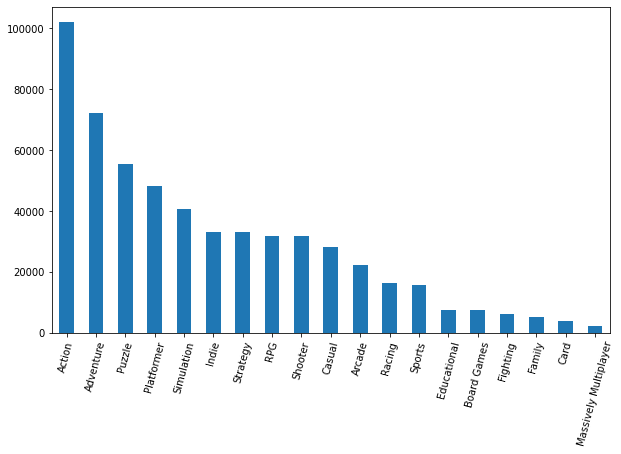

In [14]:
# most existing genres in games
df['genres'].explode().value_counts().plot(figsize=(10,6),kind='bar')
plt.xticks(np.arange(19),df['genres'].explode().value_counts().index[:19],rotation=75);

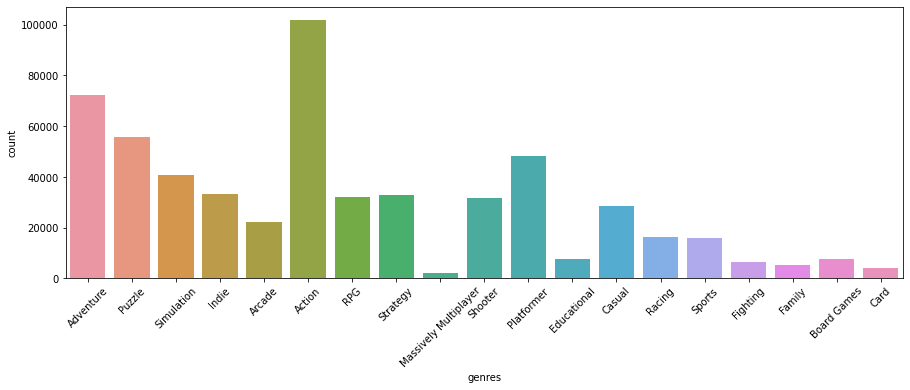

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['genres'].explode())
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

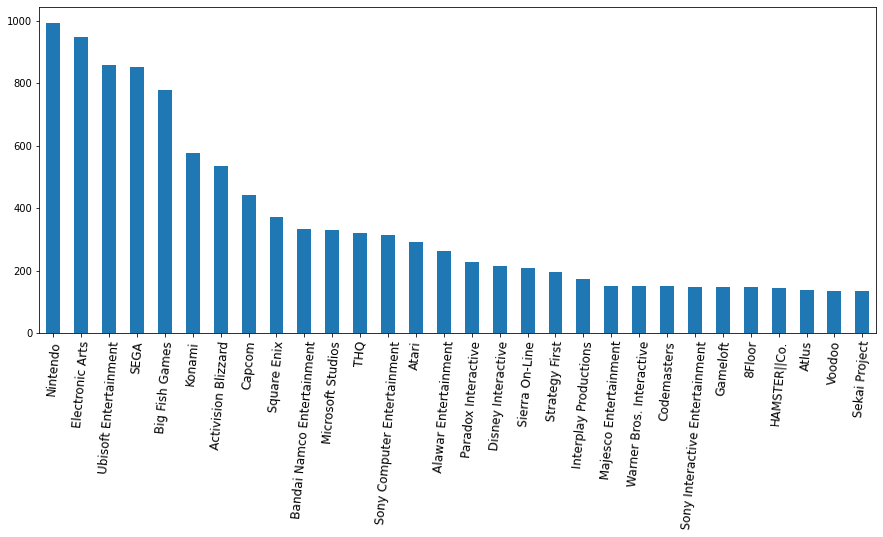

In [16]:
# most well known publishers 
df['publishers'].explode().value_counts().head(30).plot(figsize=(15,6),kind='bar')
plt.xticks(np.arange(30),df['publishers'].explode().value_counts().index[:30],rotation=85, fontsize=12);

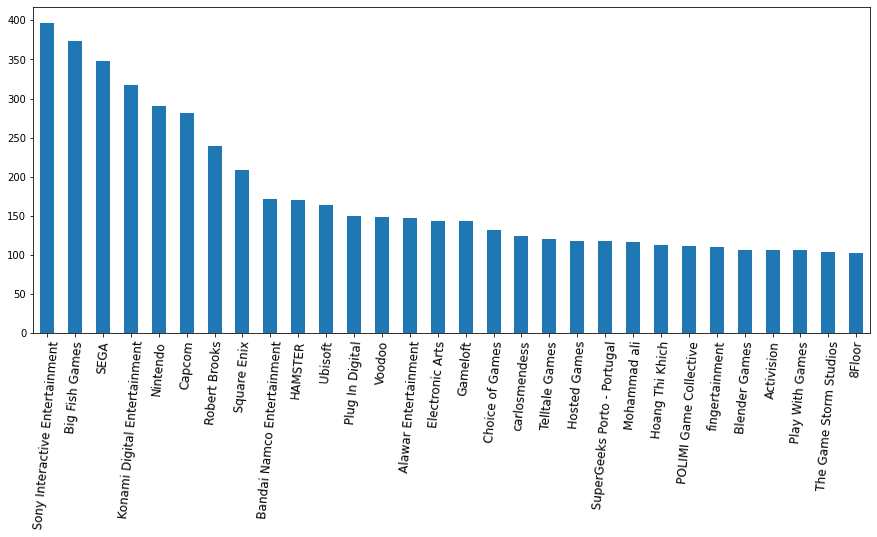

In [17]:
# most  wellknown developers

df['developers'].explode().value_counts().head(30).plot(figsize=(15,6), kind='bar')
plt.xticks(np.arange(30),df['developers'].explode().value_counts().index[:30],rotation=85, fontsize=12);

In [18]:
# categrical rating
df['rating_top'].value_counts()

0    461177
4      7112
3      2716
5      1719
1      1691
Name: rating_top, dtype: int64

In [19]:
# rating_top: Maximum rating according to rating
df.sort_values('rating', ascending=False).loc[df['rating_top'] == 5].head()

id                                         slug  \
282544  388309                                    diablo-iv   
33966      132  the-world-ends-with-you-solo-remix-for-ipad   
158411  257281                                kara-no-shojo   
433026   53135                       astro-boy-omega-factor   
133647  229144                                  hide-online   

                                       name    tba              updated  \
282544                            Diablo IV   True  2019-11-02T01:38:14   
33966   The World Ends with You: Solo Remix  False  2019-07-29T18:39:12   
158411                        Kara no Shojo  False  2019-08-28T21:51:59   
433026              Astro Boy: Omega Factor  False  2019-09-12T06:36:25   
133647                          Hide Online  False  2019-10-30T13:42:26   

        rating  rating_top  playtime  achievements_count  ratings_count  ...  \
282544    5.00           5         0                   0              5  ...   
33966     4.86           5         0                   0              7  ...   
158411    4.83           5         8                   0              6  ...   
433026    4.83           5         0                   0              6  ...   
133647    4.83           5         0                   0              6  ...   

                 developers         genres  \
282544  Activision Blizzard  [Action, RPG]   
33966           Square Enix  [Action, RPG]   
158411        Innocent Grey    [Adventure]   
433026   Hitmaker||Treasure            NaN   
133647        HitRock Games       [Action]   

                                         publishers   esrb_rating  \
282544  Activision Blizzard||Blizzard Entertainment           NaN   
33966                                   Square Enix  Everyone 10+   
158411                                   MangaGamer   Adults Only   
433026                                         SEGA           NaN   
133647                                          NaN           NaN   

       added_status_yet added_status_owned added_status_beaten  \
282544               10                  3                   1   
33966                 2                  3                   3   
158411                5                 17                   8   
433026                3                  5                   5   
133647                0                  4                   0   

       added_status_toplay  added_status_dropped  added_status_playing  
282544                  69                     0                     0  
33966                    3                     1                     0  
158411                   3                     0                     0  
433026                   5                     1                     1  
133647                   0                     1                     0  

[5 rows x 24 columns]

In [20]:
# highest play time and   rating
df.sort_values(['playtime', 'rating'],ascending=False)

id               slug                   name    tba  \
43082   14048               jack               J.A.C.K.  False   
285569  39106             shaiya                 Shaiya  False   
412876  50773        total-miner            Total Miner  False   
408793  50399        spreadstorm            Spreadstorm  False   
179738  27936       pokemon-gold   Pokémon Gold, Silver  False   
...       ...                ...                    ...    ...   
474412  99994       holy-or-dead           Holy or Dead  False   
474413  99995  airstrike-hd-demo      Airstrike HD Demo  False   
474414  99997     uranias-mirror        Urania's Mirror  False   
474415  99998         simucities             Simucities  False   
474416  99999     pocket-assault  Pocket Assault (itch)  False   

                    updated  rating  rating_top  playtime  achievements_count  \
43082   2019-04-22T11:23:49    0.00           0      1600                  18   
285569  2019-05-24T03:54:10    0.00           0      1473                   0   
412876  2019-08-28T22:03:20    0.00           0      1246                   0   
408793  2019-08-28T22:03:30    0.00           0      1046                  21   
179738  2019-09-17T08:01:32    4.36           5       900                   0   
...                     ...     ...         ...       ...                 ...   
474412  2019-01-09T12:41:06    0.00           0         0                   0   
474413  2019-01-09T12:41:06    0.00           0         0                   0   
474414  2019-01-09T12:41:06    0.00           0         0                   0   
474415  2019-01-09T12:41:06    0.00           0         0                   0   
474416  2019-01-09T12:41:06    0.00           0         0                   0   

        ratings_count  ...               developers  \
43082               0  ...       Crystice Softworks   
285569              4  ...      Sonov Entertainment   
412876              0  ...             Studio Forge   
408793              1  ...                unbeGames   
179738            298  ...               Game Freak   
...               ...  ...                      ...   
474412              0  ...                  Ralidon   
474413              0  ...  Fifth Dimension Company   
474414              0  ...               sneakthief   
474415              0  ...                keypixels   
474416              0  ...        Carsten_Ostermann   

                                 genres                     publishers  \
43082                               NaN             Crystice Softworks   
285569     [RPG, Massively Multiplayer]    Aeria Games & Entertainment   
412876  [Action, Adventure, RPG, Indie]                   Studio Forge   
408793       [Adventure, Indie, Puzzle]                      unbeGames   
179738                            [RPG]  Nintendo||The Pokemon Company   
...                                 ...                            ...   
474412                              NaN                            NaN   
474413                         [Action]                            NaN   
474414                      [Adventure]                            NaN   
474415                              NaN                            NaN   
474416                        [Shooter]                            NaN   

       esrb_rating added_status_yet added_status_owned added_status_beaten  \
43082          NaN                1                  4                   0   
285569         NaN                0                  4                   1   
412876         NaN                0                  7                   0   
408793         NaN                0                 23                   0   
179738         NaN               17                127                 357   
...            ...              ...                ...                 ...   
474412         NaN                0                  0                   0   
474413         NaN                0                  0                 

<AxesSubplot:xlabel='playtime', ylabel='rating'>

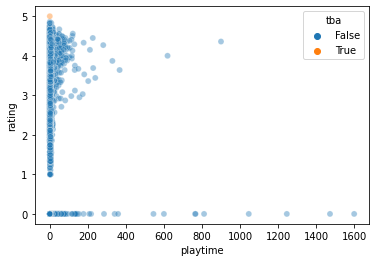

In [22]:
sns.scatterplot(data=df, x='playtime', y='rating',alpha=.4, hue='tba')

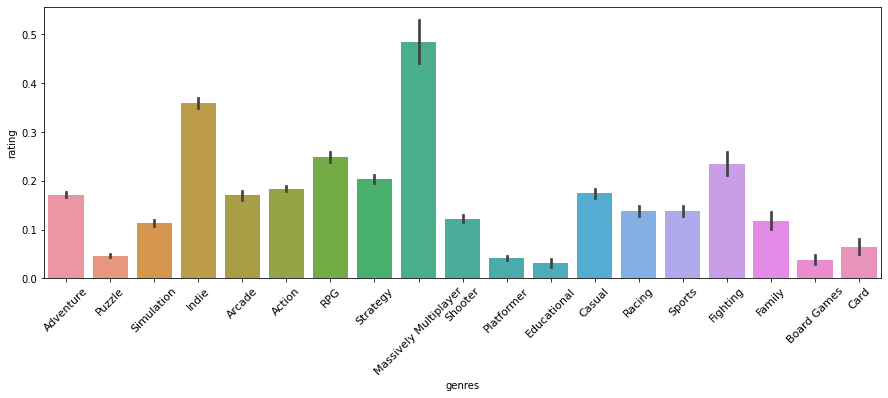

In [23]:
# genres and rating 
df0 = df.explode('genres')
plt.figure(figsize=(15,5))
sns.barplot(x='genres', y='rating', data=df0)
plt.xticks(fontsize=11,rotation=45);

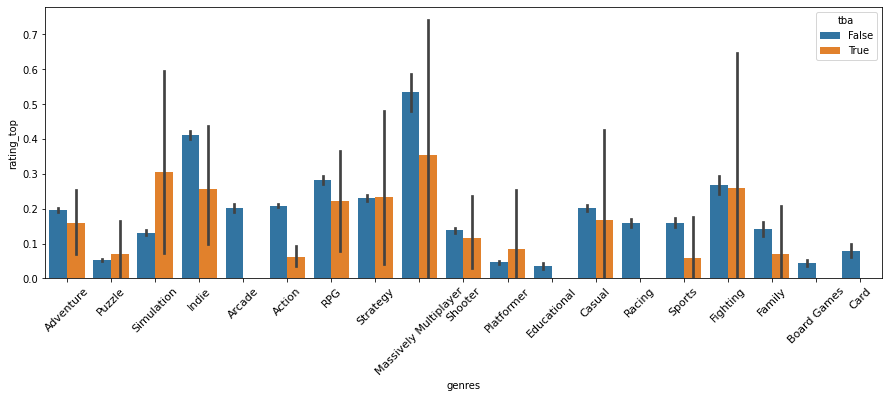

In [24]:
# genres and rating_top
df0 = df.explode('genres')
plt.figure(figsize=(15,5))
sns.barplot(x='genres', y='rating_top', data=df0,  estimator=np.mean, hue='tba')
plt.xticks(fontsize=11,rotation=45);

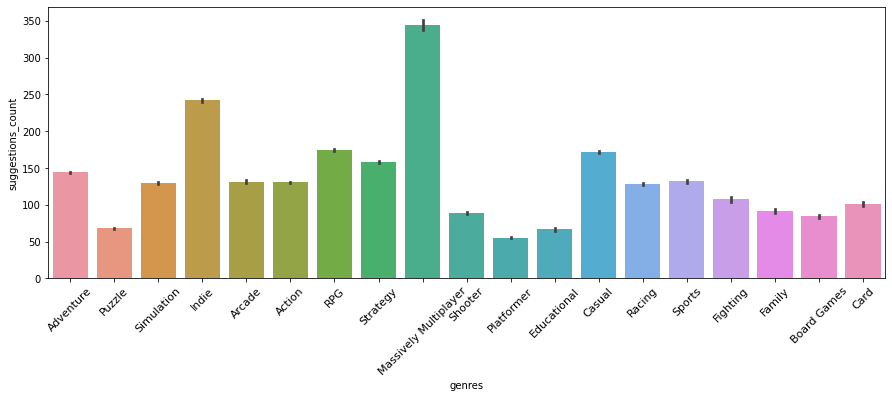

In [39]:
# genres and number of suggestions 
df0 = df.explode('genres')
plt.figure(figsize=(15,5))
sns.barplot(x='genres', y='suggestions_count', data=df0,  estimator=np.mean)
plt.xticks(fontsize=11,rotation=45);

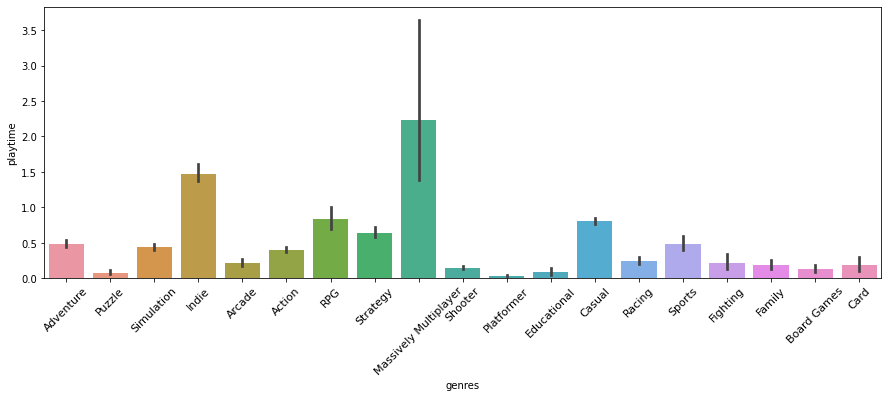

In [41]:
# genres and number of playtime hours 
df0 = df.explode('genres')
plt.figure(figsize=(15,5))
sns.barplot(x='genres', y='playtime', data=df0,  estimator=np.mean)
plt.xticks(fontsize=11,rotation=45);

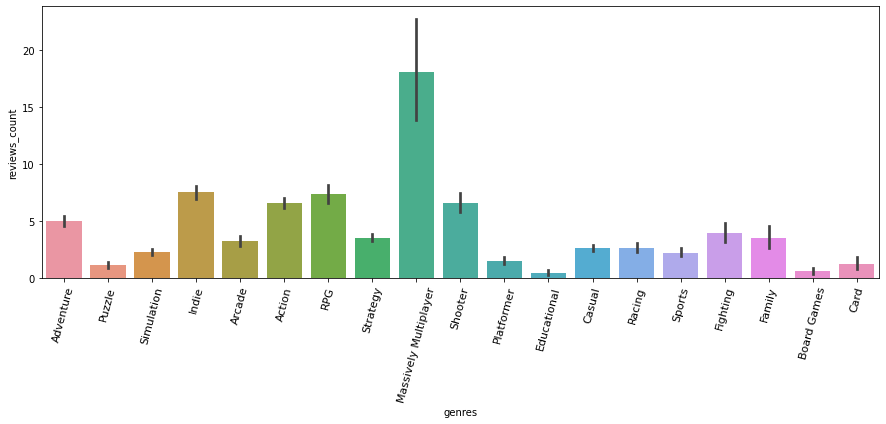

In [43]:
# genres and number of reviews 
df0 = df.explode('genres')
plt.figure(figsize=(15,5))
sns.barplot(x='genres', y='reviews_count', data=df0,  estimator=np.mean)
plt.xticks(fontsize=11,rotation=75);

<AxesSubplot:xlabel='tba', ylabel='count'>

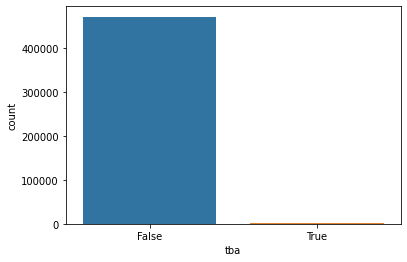

In [25]:
# count true and false values  in "To be announced state"
sns.countplot(x=df['tba'])

<AxesSubplot:xlabel='rating', ylabel='ratings_count'>

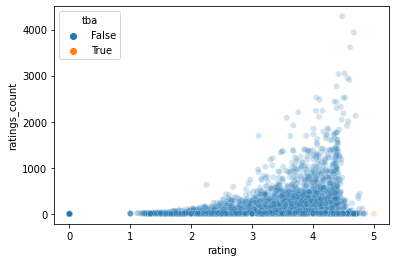

In [26]:
# count of ratings and ratings itself

sns.scatterplot(data=df, x='rating', y='ratings_count', hue='tba', alpha=0.2)

<AxesSubplot:xlabel='rating_top', ylabel='ratings_count'>

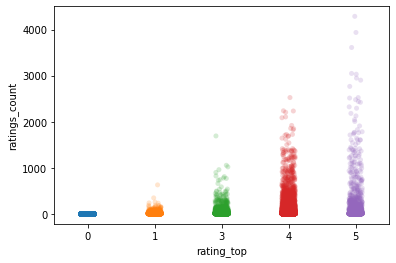

In [27]:
# count of rating_top and ratings itself

sns.stripplot(data=df, x='rating_top', y='ratings_count', alpha=0.2)

<AxesSubplot:xlabel='rating_top', ylabel='suggestions_count'>

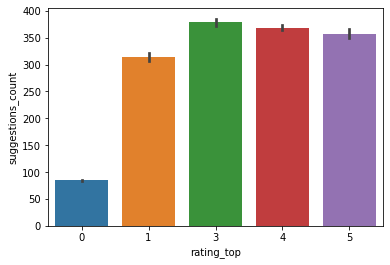

In [28]:
# mean of rating_top and suggestions_count itself

sns.barplot(data=df, x='rating_top', y='suggestions_count')

<AxesSubplot:xlabel='rating_top', ylabel='suggestions_count'>

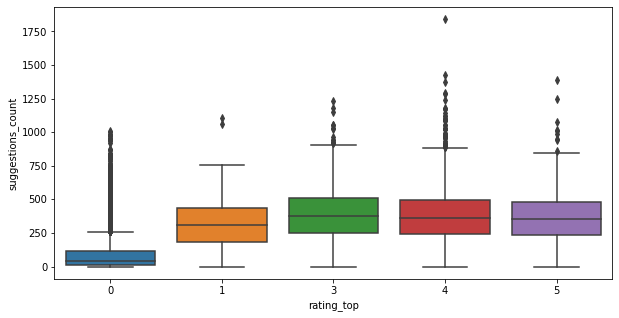

In [29]:
# boxplot of rating_top and suggestions_count itself
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='rating_top', y='suggestions_count')

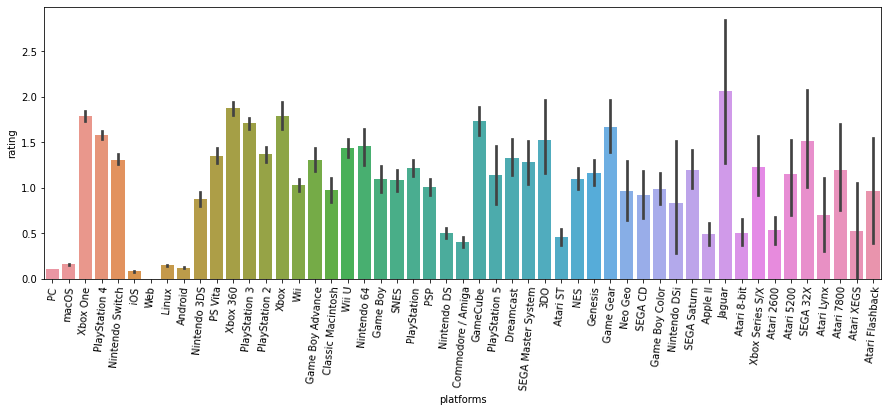

In [30]:
# mean of raitngs based on each platform
df0 = df.explode('platforms')
plt.figure(figsize=(15,5))
sns.barplot(x='platforms', y='rating', data=df0)
plt.xticks(fontsize=10,rotation=85);

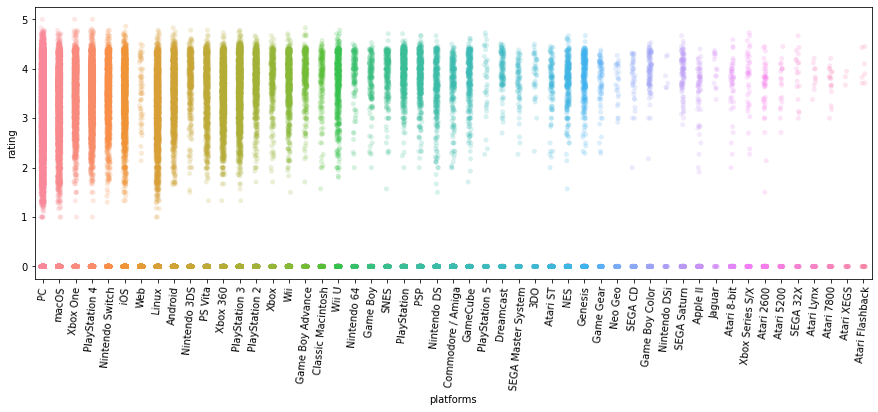

In [31]:
df0 = df.explode('platforms')
plt.figure(figsize=(15,5))
sns.stripplot(x='platforms', y='rating', data=df0, alpha=.2)
plt.xticks(fontsize=10,rotation=85);

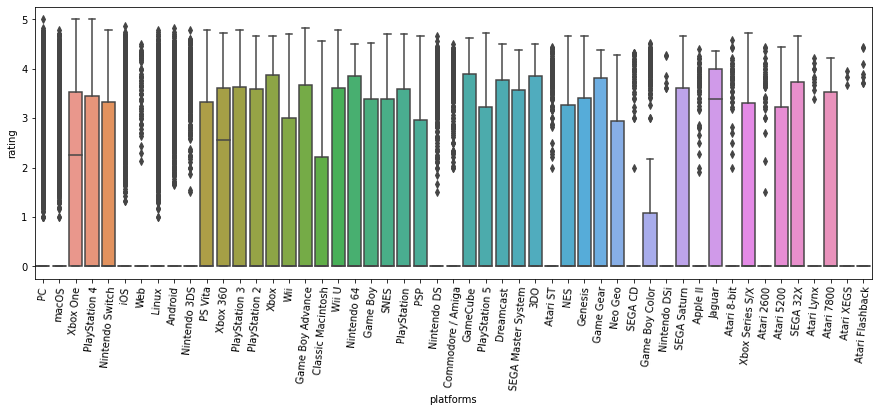

In [32]:
df0 = df.explode('platforms')
plt.figure(figsize=(15,5))
sns.boxplot(x='platforms', y='rating', data=df0)
plt.xticks(fontsize=10,rotation=85);

# most of the data paoints are zeros tat is why the median is zero

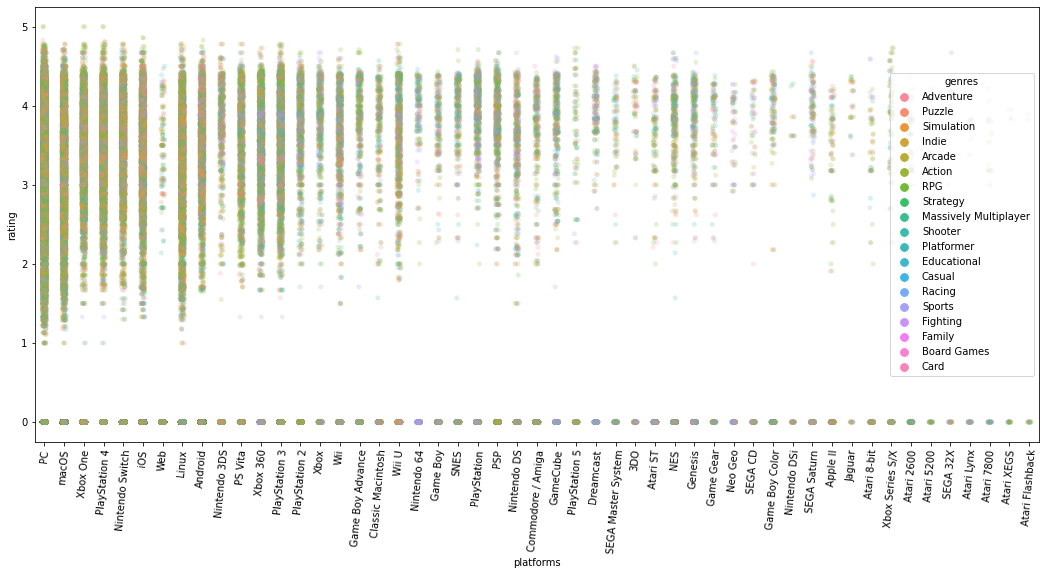

In [34]:
# applying genres as hue to get the differnce in data
df0 = df.explode('platforms')  
df0 = df0.explode('genres')
plt.figure(figsize=(18,8))
sns.stripplot(x='platforms', y='rating', data=df0, alpha=.2, hue='genres')
plt.xticks(fontsize=10,rotation=85);

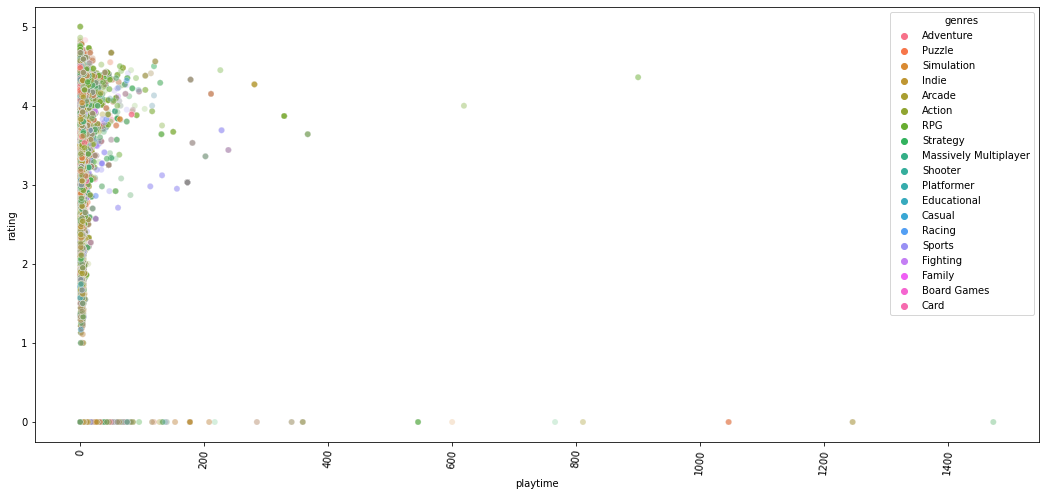

In [37]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='playtime', y='rating', data=df0, alpha=.2, hue='genres')
plt.xticks(fontsize=10,rotation=85);

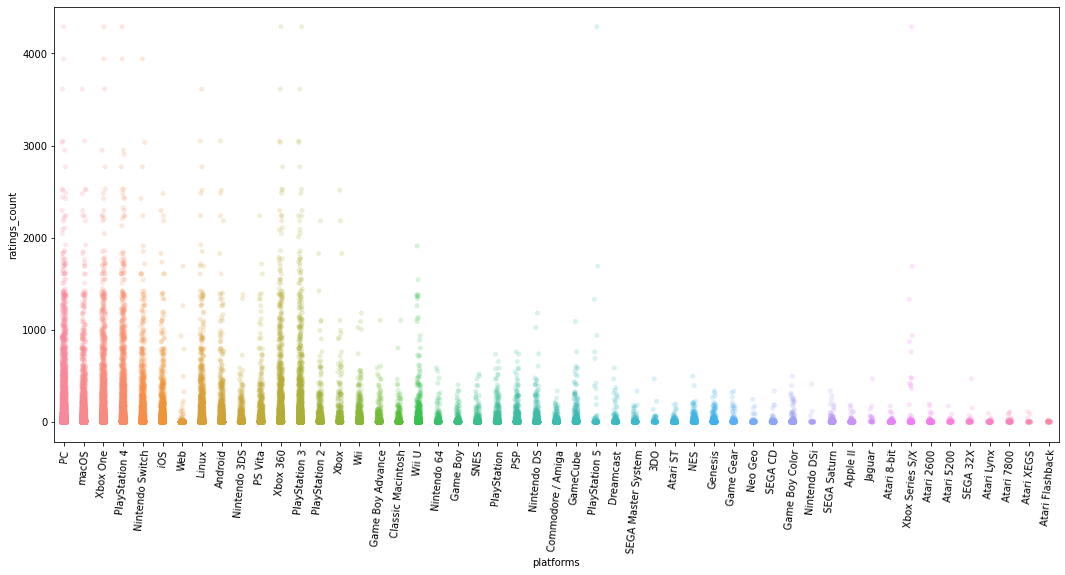

In [34]:
# scatterplot for platforms based on rating count
df0 = df.explode('platforms')
# df0 = df0.explode('genres')
plt.figure(figsize=(18,8))
sns.stripplot(x='platforms', y='ratings_count', data=df0, alpha=.2)
plt.xticks(fontsize=10,rotation=85);

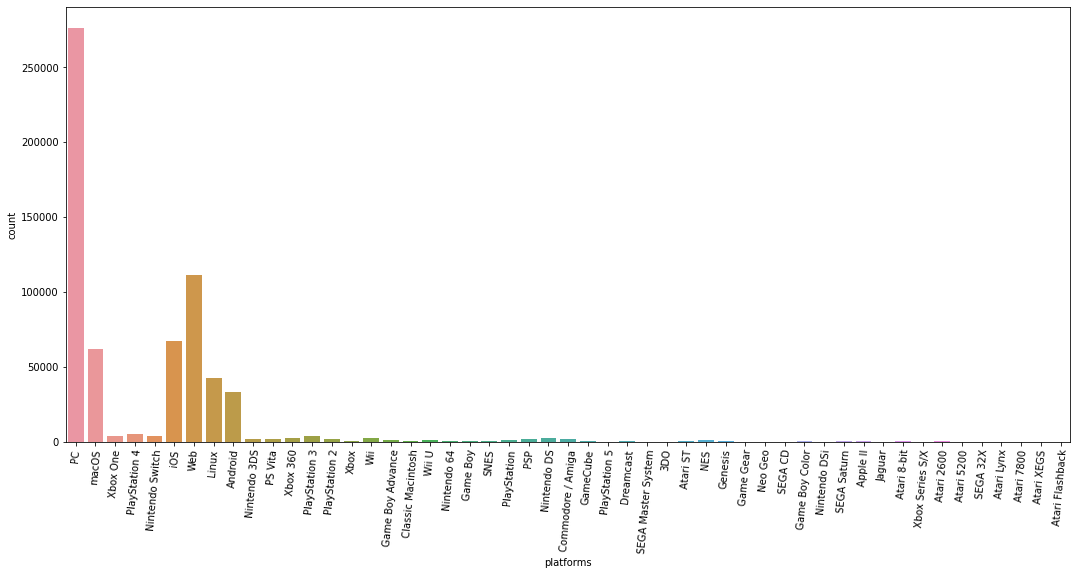

In [35]:
# counting the numbers of datapoints based on platforms
plt.figure(figsize=(18,8))
sns.countplot(x='platforms' ,data=df0)
plt.xticks(fontsize=10,rotation=85);

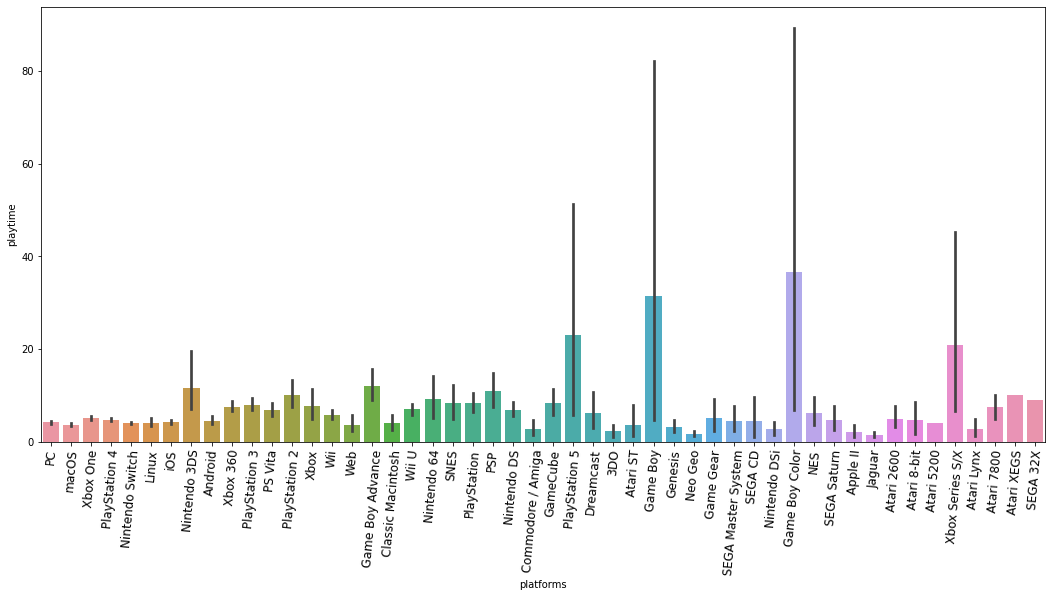

In [36]:
# average time spent on platforms that is actually played and not  equal to zero
plt.figure(figsize=(18,8))
sns.barplot(x='platforms',y='playtime' ,data=df0.loc[df0['playtime'] > 0], estimator=np.mean)
plt.xticks(fontsize=12,rotation=85);

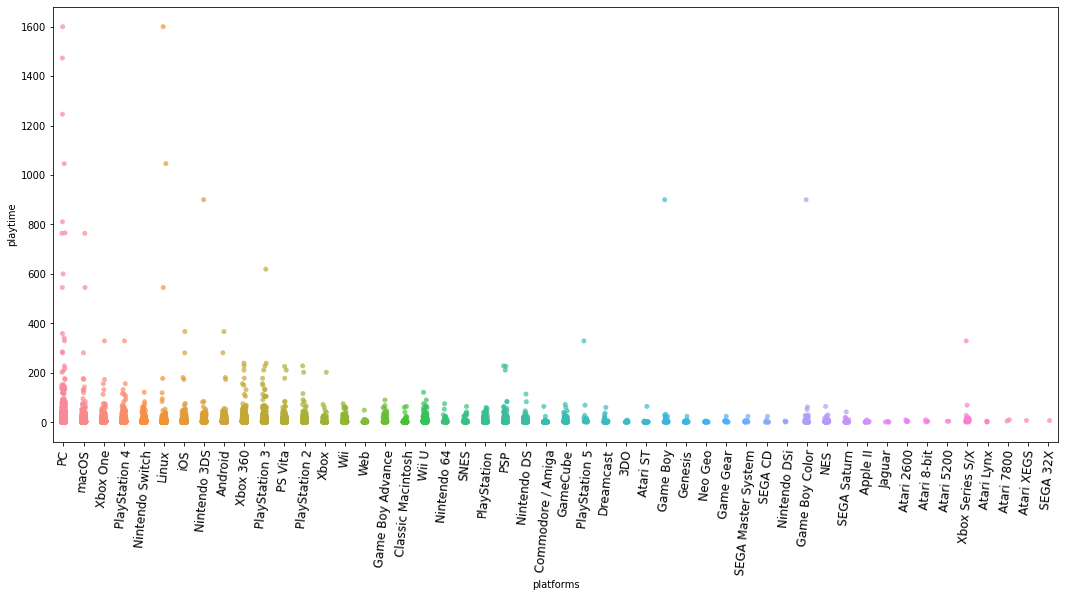

In [37]:
plt.figure(figsize=(18,8))
sns.stripplot(x='platforms',y='playtime' ,data=df0.loc[df0['playtime'] > 0], alpha=.7)
plt.xticks(fontsize=12,rotation=85);

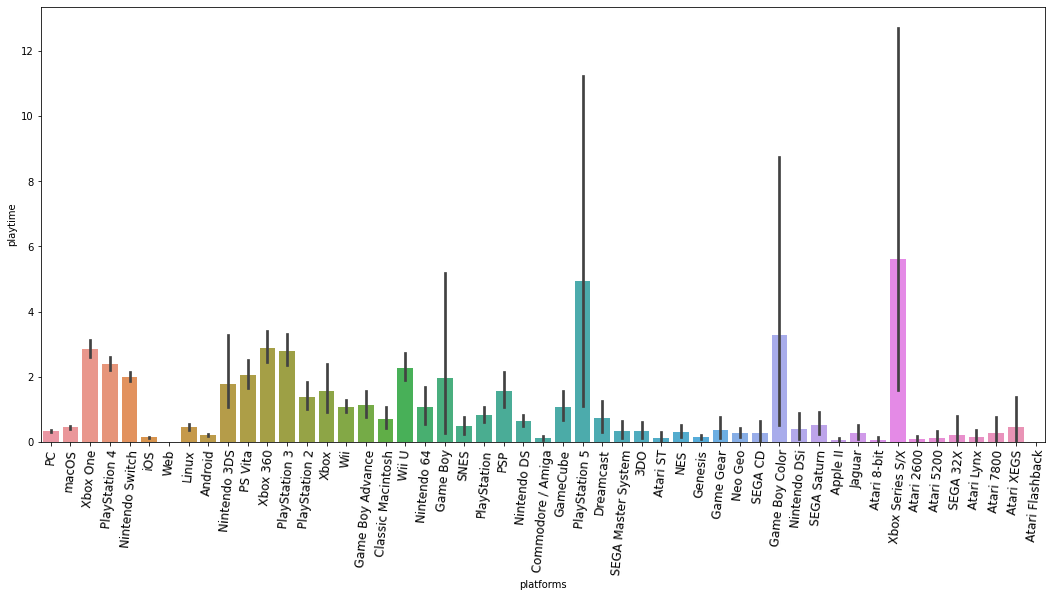

In [38]:
# average time spent on platforms
plt.figure(figsize=(18,8))
sns.barplot(x='platforms',y='playtime' ,data=df0, estimator=np.mean)
plt.xticks(fontsize=12,rotation=85);

In [39]:
# games that times was spent more than 700 hours
df[df['playtime'] > 700].sort_values('rating',ascending=False)

id                                               slug  \
179738  27936                                       pokemon-gold   
35271   13322                                      modo-indie-10   
43082   14048                                               jack   
285569  39106                                             shaiya   
408793  50399                                        spreadstorm   
412876  50773                                        total-miner   
423557  51749  romance-of-the-three-kingdoms-12-with-power-up...   
439653  59729                                   wanted-killer-vr   

                                                     name    tba  \
179738                               Pokémon Gold, Silver  False   
35271                                       MODO indie 10  False   
43082                                            J.A.C.K.  False   
285569                                             Shaiya  False   
408793                                        Spreadstorm  False   
412876                                        Total Miner  False   
423557  Romance of the Three Kingdoms 12 with Power Up...  False   
439653                                   Wanted Killer VR  False   

                    updated  rating  rating_top  playtime  achievements_count  \
179738  2019-09-17T08:01:32    4.36           5       900                   0   
35271   2019-01-09T12:41:06    0.00           0       764                   0   
43082   2019-04-22T11:23:49    0.00           0      1600                  18   
285569  2019-05-24T03:54:10    0.00           0      1473                   0   
408793  2019-08-28T22:03:30    0.00           0      1046                  21   
412876  2019-08-28T22:03:20    0.00           0      1246                   0   
423557  2019-08-28T22:02:51    0.00           0       766                   0   
439653  2019-08-28T21:59:18    0.00           0       811                  38   

        ratings_count  ...           developers  \
179738            298  ...           Game Freak   
35271               0  ...          The Foundry   
43082               0  ...   Crystice Softworks   
285569              4  ...  Sonov Entertainment   
408793              1  ...            unbeGames   
412876              0  ...         Studio Forge   
423557              0  ...           Koei Tecmo   
439653              2  ...             Playsnak   

                                 genres                     publishers  \
179738                            [RPG]  Nintendo||The Pokemon Company   
35271                               NaN                    The Foundry   
43082                               NaN             Crystice Softworks   
285569     [RPG, Massively Multiplayer]    Aeria Games & Entertainment   
408793       [Adventure, Indie, Puzzle]                      unbeGames   
412876  [Action, Adventure, RPG, Indie]                   Studio Forge   
423557                       [Strategy]            KOEI TECMO GAMES CO   
439653                  [Action, Indie]                       Playsnak   

       esrb_rating added_status_yet added_status_owned added_status_beaten  \
179738         NaN               17                127                 357   
35271          NaN                0                  4                   0   
43082          NaN                1                  4                   0   
285569         NaN                0                  4                   1   
408793         NaN                0                 23                   0   
412876         NaN                0                  7                   0   
423557         NaN                0                  4                   0   
439653         NaN                0                  4                   1   

       added_status_toplay  added_status_dropped  added_status_playing  
179738                  17                    45                     6  
35271                    0                     0                     0  
43082 

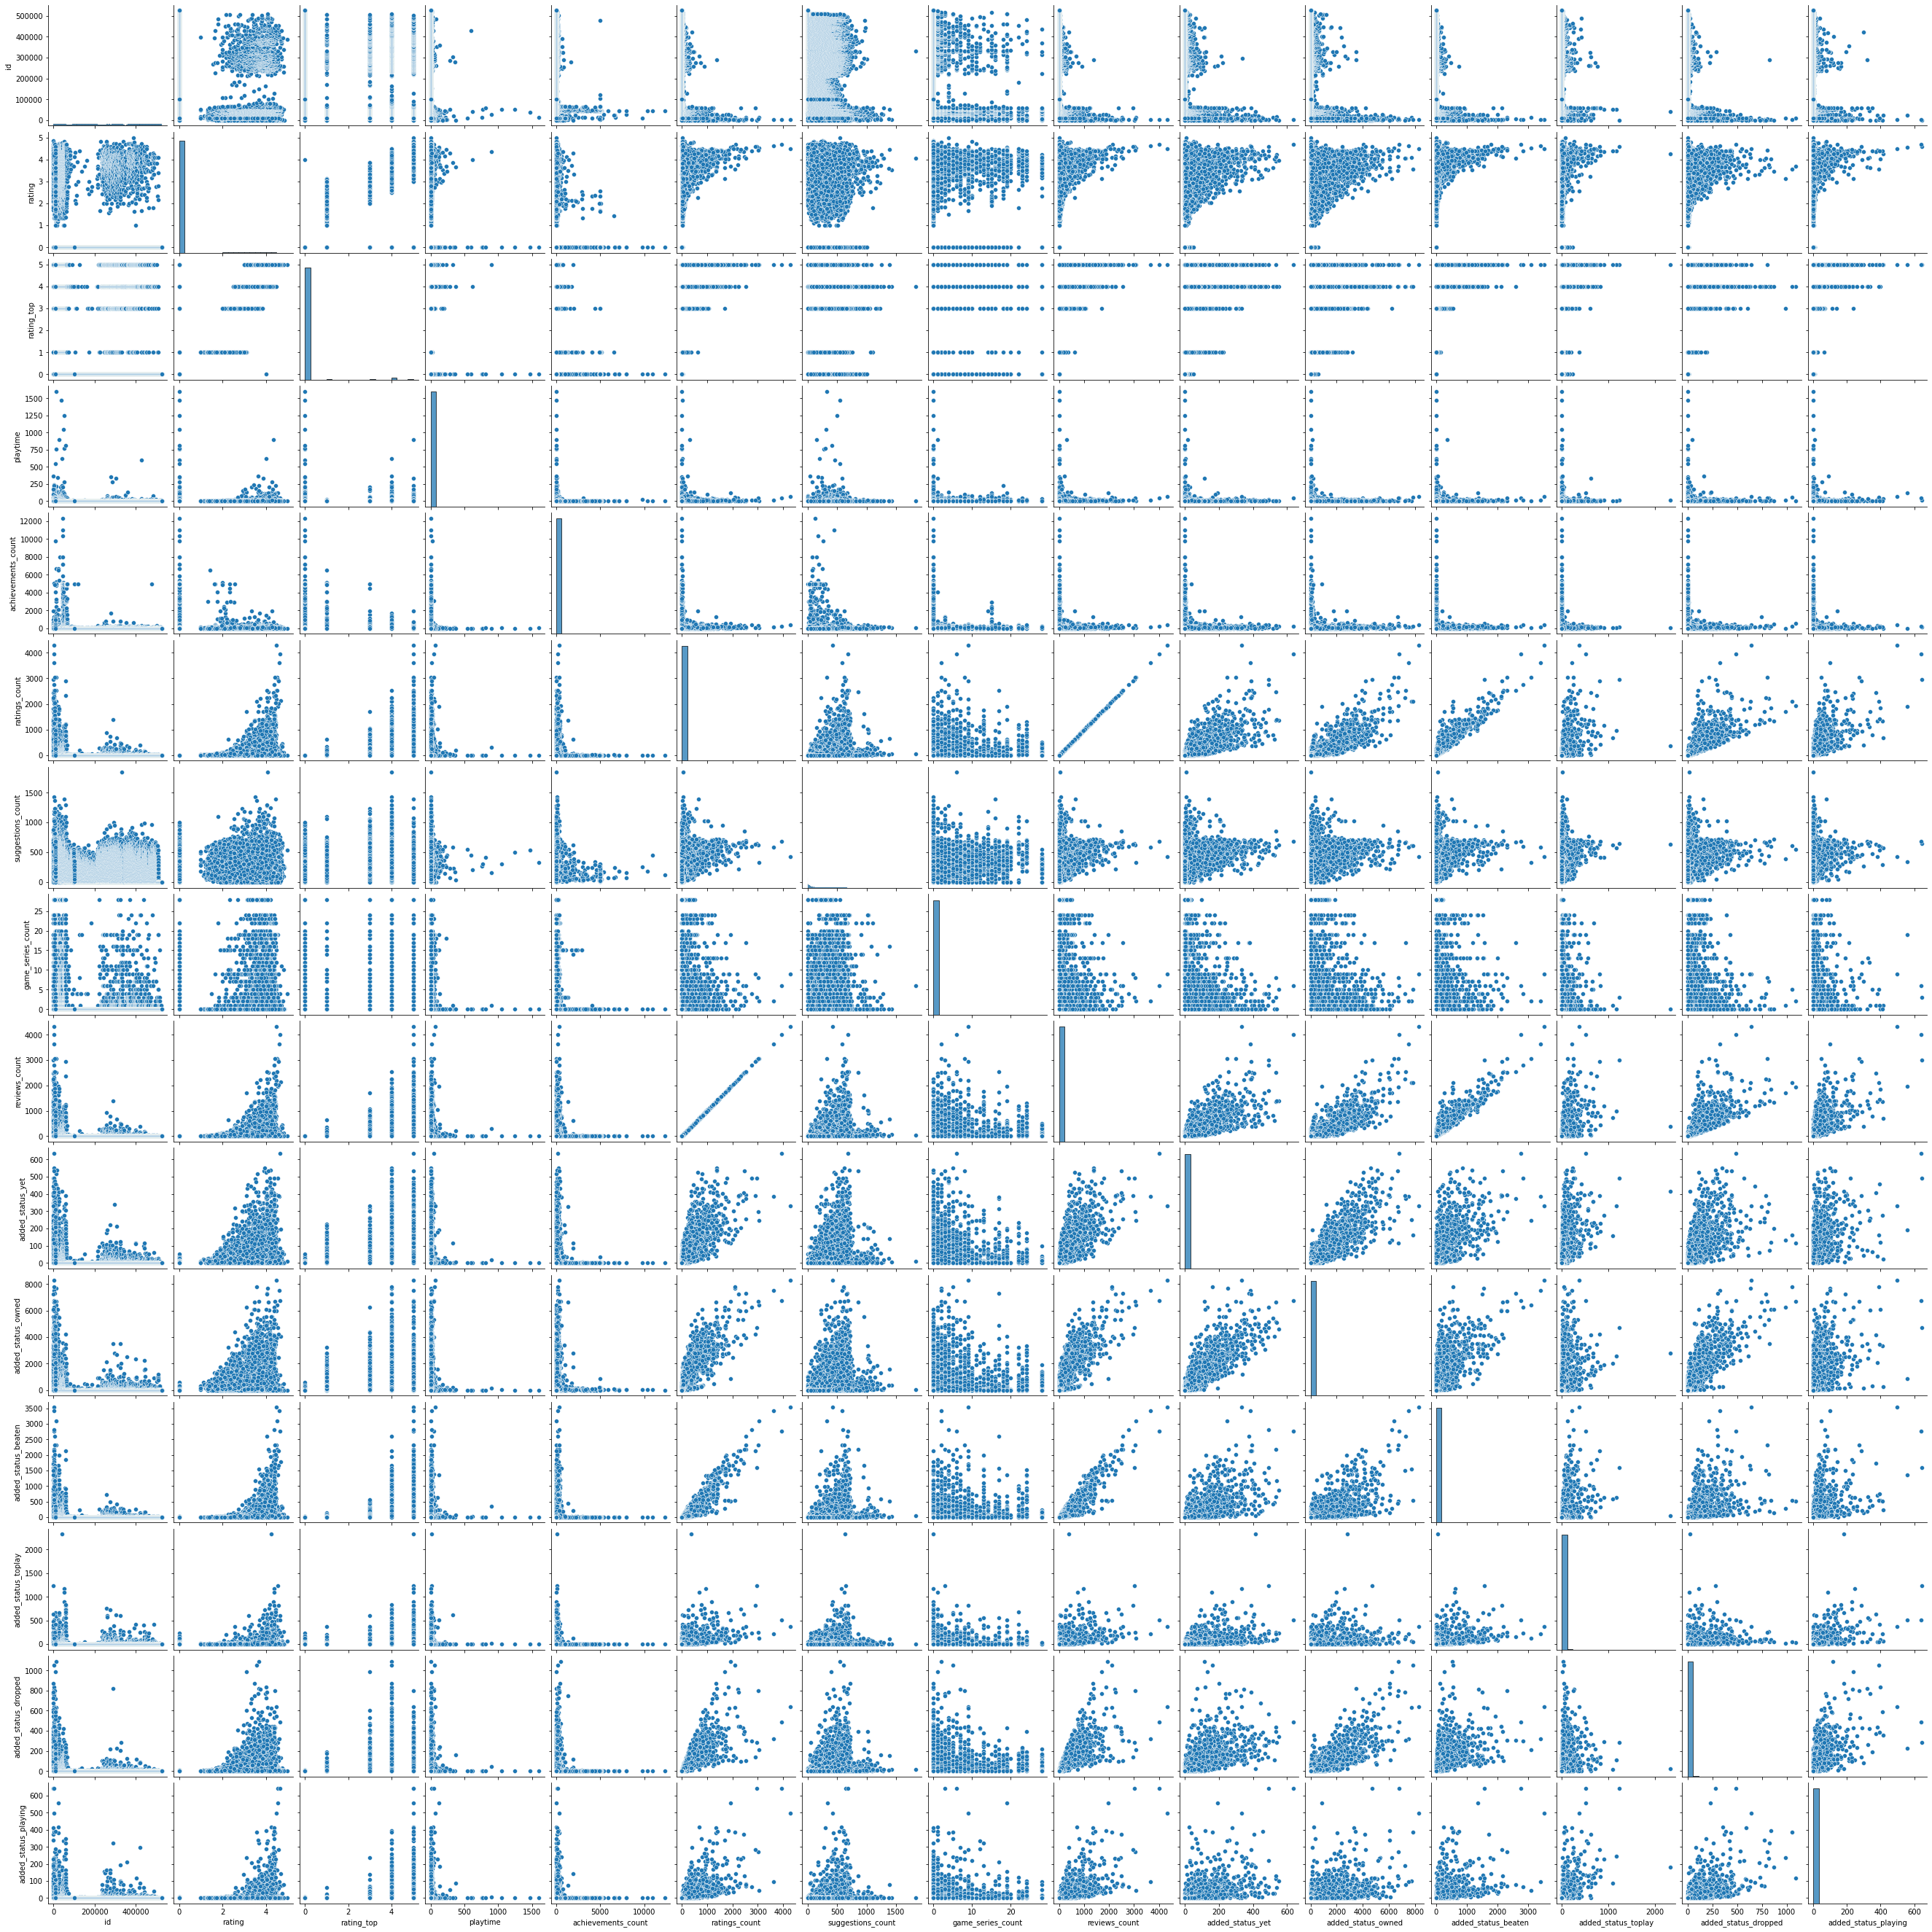

In [40]:
# shows the  raltion between the quantative values.
sns.pairplot(df.select_dtypes(include=['int64','float64']))

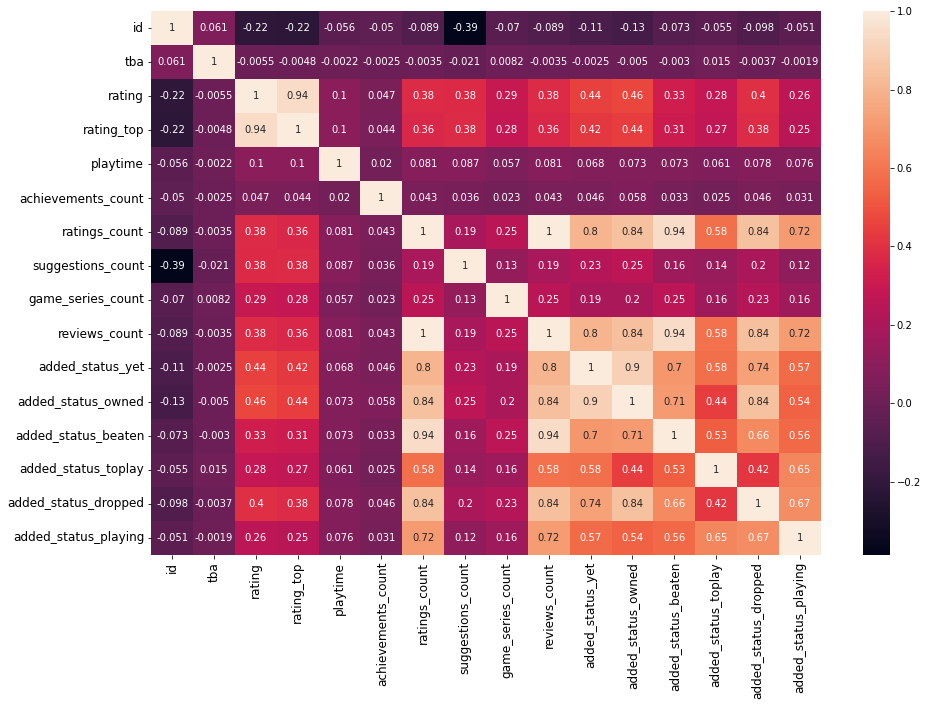

In [41]:
# shows the correlation  to check the linear realtionship between numerical  values
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## prepare the model for training

In [42]:
df.drop(['esrb_rating','id','slug','name'], axis=1, inplace=True) # delete this column as most values are missing 

In [43]:
df.dtypes

tba                        bool
updated                  object
rating                  float64
rating_top                int64
playtime                  int64
achievements_count        int64
ratings_count             int64
suggestions_count         int64
game_series_count         int64
reviews_count             int64
platforms                object
developers               object
genres                   object
publishers               object
added_status_yet          int64
added_status_owned        int64
added_status_beaten       int64
added_status_toplay       int64
added_status_dropped      int64
added_status_playing      int64
dtype: object

In [44]:
# fill the missing categorical values
df.genres.loc[df.genres.isnull()] = 'other'
df.platforms.loc[df.platforms.isnull()] = 'other'
df.developers.loc[df.developers.isnull()] = 'other'
df.publishers.loc[df.publishers.isnull()] = 'other'

/home/mohazab/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
df

tba              updated  rating  rating_top  playtime  \
0       False  2019-09-17T11:58:57     0.0           0         1   
1       False  2019-11-06T23:04:19     0.0           0         0   
2       False  2019-10-22T13:56:16     0.0           0         0   
3       False  2019-08-28T22:16:02     0.0           0         0   
4       False  2019-09-17T13:37:13     0.0           1         1   
...       ...                  ...     ...         ...       ...   
474412  False  2019-01-09T12:41:06     0.0           0         0   
474413  False  2019-01-09T12:41:06     0.0           0         0   
474414  False  2019-01-09T12:41:06     0.0           0         0   
474415  False  2019-01-09T12:41:06     0.0           0         0   
474416  False  2019-01-09T12:41:06     0.0           0         0   

        achievements_count  ratings_count  suggestions_count  \
0                       80              2                292   
1                       26              3                389   
2                        0              2                 83   
3                        0              0                455   
4                        0              5                262   
...                    ...            ...                ...   
474412                   0              0                 52   
474413                   0              0                202   
474414                   0              0                 51   
474415                   0              0                 84   
474416                   0              0                 48   

        game_series_count  reviews_count  \
0                       0              4   
1                       0              3   
2                       0              2   
3                       0              0   
4                       0              5   
...                   ...            ...   
474412                  0              0   
474413                  0              0   
474414                  0              0   
474415                  0              0   
474416                  0              0   

                                                platforms  \
0       [PC, macOS, Xbox One, PlayStation 4, Nintendo ...   
1                                   [macOS, PC, Xbox One]   
2                                                   [iOS]   
3                                     [PC, PlayStation 4]   
4                                                    [PC]   
...                                                   ...   
474412                                               [PC]   
474413                                               [PC]   
474414                                               [PC]   
474415                                               [PC]   
474416                                               [PC]   

                               developers  \
0                     West Coast Software   
1                              Soma Games   
2                         Prettygreat Pty   
3       Oasis Games||Geronimo Interactive   
4                              Viking Tao   
...                                   ...   
474412                            Ralidon   
474413            Fifth Dimension Company   
474414                         sneakthief   
474415                          keypixels   
474416                  Carsten_Ostermann   

                                        genres  \
0                          [Adventure, Puzzle]   
1                          [Simulation, Indie]   
2                          [Adventure, Arcade]   
3                              [Action, Indie]   
4       [RPG, Strategy, Massively Multiplayer]   
...                                        ...   
474412                                   other   
474413                                [Action]   
474414                             [Adventure]   
474415                                   other   
474416                               [Shooter]   

                    

In [46]:
import collections

# counting the values and create  a datafrmae from list as onehotencoding dataframe
df1=df['genres'].apply(collections.Counter) 

df_genres = pd.DataFrame.from_records(df1).fillna(value=0)


df1=df['platforms'].apply(collections.Counter) 

df_platforms = pd.DataFrame.from_records(df1).fillna(value=0)

In [47]:
df.drop(['genres','platforms'], axis=1, inplace=True)

In [48]:
df['developers'].nunique()

213724

In [49]:
df.drop('updated', axis=1, inplace=True) # datatime values that arre not requires for   the model

In [50]:
df.drop(['developers','publishers'], axis=1, inplace=True) # too many small values that would  not have much 
# affect on the learning phase and increase the complexity of the  model.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474415 entries, 0 to 474416
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tba                   474415 non-null  bool   
 1   rating                474415 non-null  float64
 2   rating_top            474415 non-null  int64  
 3   playtime              474415 non-null  int64  
 4   achievements_count    474415 non-null  int64  
 5   ratings_count         474415 non-null  int64  
 6   suggestions_count     474415 non-null  int64  
 7   game_series_count     474415 non-null  int64  
 8   reviews_count         474415 non-null  int64  
 9   added_status_yet      474415 non-null  int64  
 10  added_status_owned    474415 non-null  int64  
 11  added_status_beaten   474415 non-null  int64  
 12  added_status_toplay   474415 non-null  int64  
 13  added_status_dropped  474415 non-null  int64  
 14  added_status_playing  474415 non-null  int64  
dtype

In [69]:
df.drop('tba', axis=1, inplace=True) # delete the to be announced column as it is  in our  model

In [70]:
concatenated_dataframes = pd.concat(
    [
        df.reset_index(drop=True),
        df_genres,
        df_platforms
    ],
    axis=1,
)

In [71]:
concatenated_dataframes

rating  rating_top  playtime  achievements_count  ratings_count  \
0          0.0           0         1                  80              2   
1          0.0           0         0                  26              3   
2          0.0           0         0                   0              2   
3          0.0           0         0                   0              0   
4          0.0           1         1                   0              5   
...        ...         ...       ...                 ...            ...   
474410     0.0           0         0                   0              0   
474411     0.0           0         0                   0              0   
474412     0.0           0         0                   0              0   
474413     0.0           0         0                   0              0   
474414     0.0           0         0                   0              0   

        suggestions_count  game_series_count  reviews_count  added_status_yet  \
0                     292                  0              4                 4   
1                     389                  0              3                 2   
2                      83                  0              2                 0   
3                     455                  0              0                 0   
4                     262                  0              5                 2   
...                   ...                ...            ...               ...   
474410                 52                  0              0                 0   
474411                202                  0              0                 0   
474412                 51                  0              0                 0   
474413                 84                  0              0                 0   
474414                 48                  0              0                 0   

        added_status_owned  ...  Jaguar  Atari 8-bit  Xbox Series S/X  \
0                       88  ...     0.0          0.0              0.0   
1                       42  ...     0.0          0.0              0.0   
2                        2  ...     0.0          0.0              0.0   
3                        1  ...     0.0          0.0              0.0   
4                       79  ...     0.0          0.0              0.0   
...                    ...  ...     ...          ...              ...   
474410                   0  ...     0.0          0.0              0.0   
474411                   0  ...     0.0          0.0              0.0   
474412                   0  ...     0.0          0.0              0.0   
474413                   0  ...     0.0          0.0              0.0   
474414                   0  ...     0.0          0.0              0.0   

        Atari 2600  Atari 5200  SEGA 32X  Atari Lynx  Atari 7800  Atari XEGS  \
0              0.0         0.0       0.0         0.0         0.0         0.0   
1              0.0         0.0       0.0         0.0         0.0         0.0   
2              0.0         0.0       0.0         0.0         0.0         0.0   
3              0.0         0.0       0.0         0.0         0.0         0.0   
4              0.0         0.0       0.0         0.0         0.0         0.0   
...            ...         ...       ...         ...         ...         ...   
474410         0.0         0.0       0.0         0.0         0.0         0.0   
474411         0.0         0.0       0.0         0.0         0.0         0.0   
474412         0.0         0.0       0.0         0.0         0.0         0.0   
474413         0.0         0.0       0.0         0.0         0.0         0.0   
474414         0.0         0.0       0.0         0.0         0.0         0.0   

        Atari Flashback  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
474410              0.0  
474411              0.0  
474412              0.0  
474413              0.0  
474414    

In [72]:
concatenated_dataframes.to_csv('final.csv')